In [1]:
# MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((訓練用圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


是什麼? 5


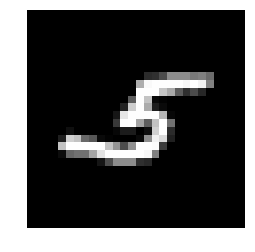

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
plt.axis("off")
print("是什麼?", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

0   1   2   3    4    5    6    7    8    9  ...   18   19   20   21   22  \
0    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
1    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
2    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
3    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
4    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
5    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
6    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
7    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
8    0   0   0   0    0    0    0    0    0    0 ...  141  141  141  121  128   
9    0   0   0   0    0    0    0    0    0    0 ...  254  254  247  254  244   
10   0   0   0   0    0    0    0    0    0    0 ...  169   92   47   75   39   
11   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
12   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
13   0   0   0   0    0    0    0    0    0    0 ...    7    0    0    0    0   
14   0   0   0   0    0    0    0    0    0    0 ...  113    0    0    0    0   
15   0   0   0   0    0   15    0    0    0    0 ...   43    0    0    0    0   
16   0   0   0   0   31  208  194  104   87   10 ...   32    0    0    0    0   
17   0   0   0   0  195  254  254  254  254  254 ...    0    0    0    0    0   
18   0   0   0   0   12  103  113  113  165  227 ...    0    0    0    0    0   
19   0   0   0   0    0    0    0    0    0   21 ...    0    0    0    0    0   
20   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
21   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
22   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
23   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
24   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
25   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
26   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
27   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   

     23  24  25  26  27  
0     0   0   0   0   0  
1     0   0   0   0   0  
2     0   0   0   0   0  
3     0   0   0   0   0  
4     0   0   0   0   0  
5     0   0   0   0   0  
6     0   0   0   0   0  
7     0   0   0   0   0  
8   107   0   0   0   0  
9   129   0   0   0   0  
10    0   0   0   0   0  
11    0   0   0   0   0  
12    0   0   0   0   0  
13    0   0   0   0   0  
14    0   0   0   0   0  
15    0   0   0   0   0  
16    0   0   0   0   0  
17    0   0   0   0   0  
18    0   0   0   0   0  
19    0   0   0   0   0  
20    0   0   0   0   0  
21    0   0   0   0   0  
22    0   0   0   0   0  
23    0   0   0   0   0  
24    0   0   0   0   0  
25    0   0   0   0   0  
26    0   0   0   0   0  
27    0   0   0   0   0  

[28 rows x 28 columns]

In [6]:
# 圖片處理:1. 攤開:reshape  2. 為了符合keras預期輸入: 0-255 -> 0-1
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255
# x_train_reshape[c]

In [7]:
# 答案處理: 多個機率(One-Hot Encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("轉化:", y_train_cat[0])

原本: 5
轉化: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
